In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
data_set = pd.DataFrame(load_boston().data)
class_labels = pd.DataFrame(load_boston().target)


In [3]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(data_set,class_labels, test_size=0.30, random_state=13)
train_data = pd.DataFrame(train_data)
train_labels = pd.DataFrame(train_labels)

In [4]:
train_data.shape

(354, 13)

In [5]:
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)

test_data = scaler.transform(test_data)


In [6]:
[rows,columns] = train_data.shape
weights = np.random.rand(1,columns)
bias = np.random.rand(1)

In [7]:
prev_error = 1
current_error = 0

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
# random_instances = np.array(randint(stoch, len(train_data)))
r = 0.1
# stoch = 100

from sklearn.utils import shuffle
from random import randint

count = 0
while(count == 0):
    
    selected_instances = []
    selected_instances_labels = []
    
    prev_error = current_error
    stoch = np.random.randint(low = 100, high=rows,size=1)
    random_instances = np.random.randint(low = 0, high=rows,size=stoch)
    selected_instances = pd.DataFrame(train_data).iloc[random_instances,:]
    selected_instances_labels = train_labels.iloc[random_instances]
    
    weight_into_instances =  np.array(np.matmul(selected_instances,weights.T))
   
    current_error = selected_instances_labels - (np.array(list(map(lambda x: x + bias, weight_into_instances))))
    
    grad_W = (-2/rows)*np.dot(selected_instances.T,current_error)
    grad_b = (-2/rows)*sum(current_error)
    
    weights = weights - r*(grad_W.T)
    bias = bias - r*(grad_b)
    
    r = r/20
    
    # print(abs(np.mean(abs(current_error))))
    
    if( np.float( abs(np.mean(abs(current_error)) - np.mean(abs(prev_error))) ) <= 0.0001):
        count = 1
        

In [8]:
grad_W.shape

(13, 1)

In [9]:
predict_labels_user_def = (np.dot(test_data,weights.T) + bias)

rmse_user_def = np.sqrt(np.mean(np.square(test_labels-predict_labels_user_def)))

In [10]:
clf = SGDRegressor(alpha=0.5,max_iter=1000)
clf.fit(train_data, train_labels)
predict_labels_sklearn = pd.DataFrame(clf.predict(test_data))

rmse_sklearn = np.sqrt(np.mean(np.square(test_labels-predict_labels_sklearn)))

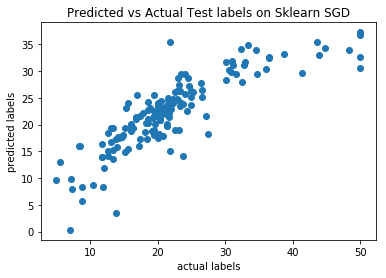

In [11]:
plt.scatter(test_labels, predict_labels_sklearn)
plt.title('Predicted vs Actual Test labels on Sklearn SGD')
plt.xlabel('actual labels')
plt.ylabel('predicted labels')
plt.show()

In [12]:
# e = np.squeeze(np.asarray(e))
rmse_user_def

0    23.326929
dtype: float64

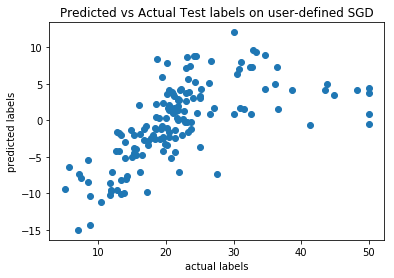

In [13]:
# https://matplotlib.org/gallery/shapes_and_collections/scatter.html

import matplotlib.pyplot as plt

plt.scatter(test_labels, predict_labels_user_def)
plt.title('Predicted vs Actual Test labels on user-defined SGD')
plt.xlabel('actual labels')
plt.ylabel('predicted labels')
plt.show()

In [14]:
weights_sgd =pd.DataFrame(clf.coef_)
weights = pd.DataFrame(weights).T
from prettytable import PrettyTable
t = PrettyTable(['SGD User Def', 'SGD Sklearn'])
t.add_row([weights,weights_sgd])
print(t)

+--------------+--------------+
| SGD User Def | SGD Sklearn  |
+--------------+--------------+
|            0 |            0 |
| 0  -0.446449 | 0  -0.652495 |
| 1   0.681069 | 1   0.654098 |
| 2  -0.045961 | 2  -0.535102 |
| 3   0.564955 | 3   0.895802 |
| 4  -0.023512 | 4  -0.394832 |
| 5   1.089196 | 5   2.350265 |
| 6  -0.876233 | 6  -0.244703 |
| 7   1.451273 | 7  -1.010560 |
| 8  -0.340808 | 8   0.340481 |
| 9  -0.625085 | 9  -0.503167 |
| 10 -0.123922 | 10 -1.355406 |
| 11  1.284835 | 11  0.615134 |
| 12 -0.360881 | 12 -2.524633 |
+--------------+--------------+


In [15]:
from prettytable import PrettyTable
t = PrettyTable(['SGD User Def', 'SGD Sklearn'])
t.add_row([np.float(rmse_user_def),np.float(rmse_sklearn)])
print(t)

+--------------------+-------------------+
|    SGD User Def    |    SGD Sklearn    |
+--------------------+-------------------+
| 23.326929227541633 | 9.291321658600799 |
+--------------------+-------------------+
